Accuracy with 10 estimators: 0.8182
n_estimators:  10 | Train Accuracy: 0.8186 | Test Accuracy: 0.8182
n_estimators:  20 | Train Accuracy: 0.8232 | Test Accuracy: 0.8244
n_estimators:  30 | Train Accuracy: 0.8282 | Test Accuracy: 0.8310
n_estimators:  40 | Train Accuracy: 0.8284 | Test Accuracy: 0.8314
n_estimators:  50 | Train Accuracy: 0.8295 | Test Accuracy: 0.8327
n_estimators:  60 | Train Accuracy: 0.8307 | Test Accuracy: 0.8328
n_estimators:  70 | Train Accuracy: 0.8311 | Test Accuracy: 0.8334
n_estimators:  80 | Train Accuracy: 0.8315 | Test Accuracy: 0.8335
n_estimators:  90 | Train Accuracy: 0.8324 | Test Accuracy: 0.8329
n_estimators: 100 | Train Accuracy: 0.8320 | Test Accuracy: 0.8328
n_estimators: 150 | Train Accuracy: 0.8326 | Test Accuracy: 0.8329
n_estimators: 200 | Train Accuracy: 0.8336 | Test Accuracy: 0.8332

Best performance: 0.8335 with 80 estimators


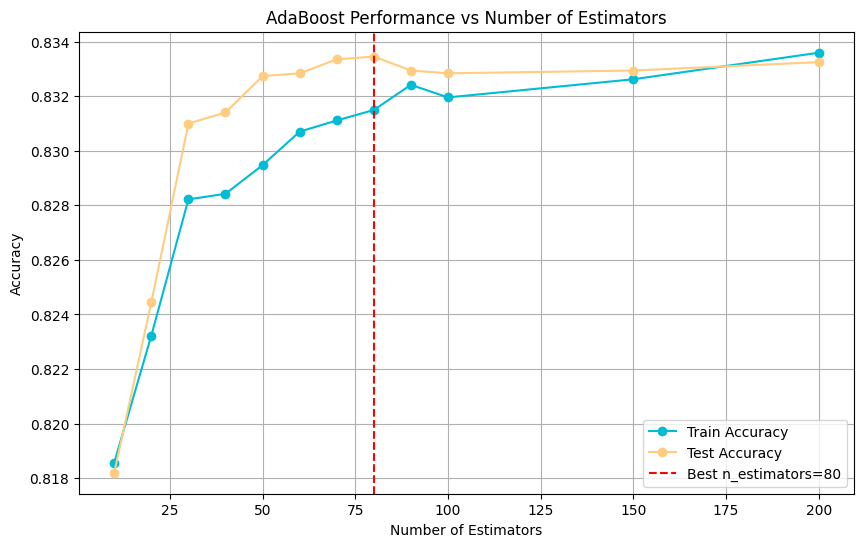

In [6]:
import pandas as pd
import numpy as np
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('/content/income.csv')

# Split into features and target
X = df.drop('income_level', axis=1)
y = df['income_level']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize base estimator (default is DecisionTree with max_depth=1)
base_estimator = DecisionTreeClassifier(max_depth=1)

# 1. Initial model with n_estimators=10
ada = AdaBoostClassifier(estimator=base_estimator, n_estimators=10, random_state=42)
ada.fit(X_train, y_train)
y_pred = ada.predict(X_test)
score_10 = accuracy_score(y_test, y_pred)
print(f"Accuracy with 10 estimators: {score_10:.4f}")

# 2. Fine-tuning by testing different numbers of trees
n_estimators_range = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 150, 200]
train_scores = []
test_scores = []

for n in n_estimators_range:
    ada = AdaBoostClassifier(estimator=base_estimator, n_estimators=n, random_state=42)
    ada.fit(X_train, y_train)

    # Training accuracy
    train_pred = ada.predict(X_train)
    train_acc = accuracy_score(y_train, train_pred)
    train_scores.append(train_acc)

    # Test accuracy
    test_pred = ada.predict(X_test)
    test_acc = accuracy_score(y_test, test_pred)
    test_scores.append(test_acc)

    print(f"n_estimators: {n:3d} | Train Accuracy: {train_acc:.4f} | Test Accuracy: {test_acc:.4f}")

# Find the best number of estimators
best_n = n_estimators_range[np.argmax(test_scores)]
best_score = max(test_scores)
print(f"\nBest performance: {best_score:.4f} with {best_n} estimators")

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_range, train_scores, label='Train Accuracy', marker='o', color='#00bcd4')
plt.plot(n_estimators_range, test_scores, label='Test Accuracy', marker='o', color='#ffcc80')
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.title('AdaBoost Performance vs Number of Estimators')
plt.axvline(x=best_n, color='r', linestyle='--', label=f'Best n_estimators={best_n}')
plt.legend()
plt.grid(True)
plt.show()
